In [131]:
%pylab inline
from sklearn import datasets
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [132]:
iris = datasets.load_iris()
x = iris['data'][iris['target'] != 2][:,:2]
y = iris['target'][iris['target'] != 2]
XY = np.hstack((x,y.reshape(len(y),1)))

In [133]:
weights = np.ones(y.size)/len(y)

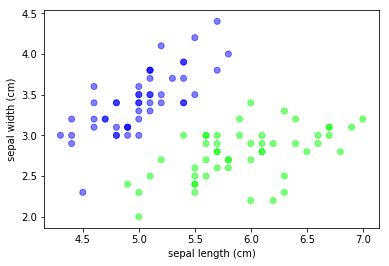

In [134]:
scatter(x[:,0], x[:,1], c=y, cmap=cm.brg, alpha=0.5)
xlabel(iris.feature_names[0]);
ylabel(iris.feature_names[1]);

## Gini Index formula
gini_index = sum(proportion * (1.0 - proportion))

gini_index = 1.0 - sum(proportion * proportion)

In [155]:
# Big-O(l*n)
def gini_index(groups_and_weights, labels):
    groups = groups_and_weights[0]
    weights = groups_and_weights[1]
    
    n = float(sum([(len(group)) for group in groups]))
    gini = 0.0
    
    for wt_idx, group in enumerate(groups):
        size = float(len(group))
        wt_of_group = sum([i for i in weights[wt_idx]])
        if size == 0:
            continue
        score = 0.0
        for label in labels:
            p = 0.0
            # Count the proportion of label in the given group
            for i, row in enumerate(group):
                if int(row[-1]) == int(label):
                    p += weights[wt_idx][i] * 1/wt_of_group
            score += p * p
        gini += (1.0 - score) * wt_of_group
    return gini

In [156]:
# Big-O(n)
def create_split(dataset, index, value, weight):
    left = []
    leftweight = []
    right = []
    rightweight = []
    for i, point in enumerate(dataset):
        if point[index] > value:
            right.append(point)
            rightweight.append(weight[i])
        else:
            left.append(point)
            leftweight.append(weight[i])
    return ((left, right), (leftweight, rightweight))

In [159]:
def find_best_split(dataset, weights):
    best_g, best_index, best_value = 9999, 9999, 9999
    for feature_index in range(len(dataset[0])-1):
        for row in dataset:
            g = (gini_index(create_split(dataset, feature_index, row[feature_index], weights),[0,1]))
            if best_g > g:
                best_index = feature_index
                best_value = row[feature_index]
                best_g = g
                
    return best_g, best_index, best_value

In [227]:
class DecisionTree():
    def __init__(self):
        self.index = None
        self.threshold = None
        self.index = None
        self.threshold = None
        self.gini_coeff = None

    # Big-O(l*n)
    def gini_index(self, groups_and_weights, labels):
        groups = groups_and_weights[0]
        weights = groups_and_weights[1]

        n = float(sum([(len(group)) for group in groups]))
        gini = 0.0

        for wt_idx, group in enumerate(groups):
            size = float(len(group))
            wt_of_group = sum([i for i in weights[wt_idx]])
            if size == 0:
                continue
            score = 0.0
            for label in labels:
                p = 0.0
                # Count the proportion of label in the given group
                for i, row in enumerate(group):
                    if int(row[-1]) == int(label):
                        p += weights[wt_idx][i] * 1/wt_of_group
                score += p * p
            gini += (1.0 - score) * wt_of_group
        return gini
    
    # Big-O(n)
    def create_split(self, dataset, index, value, weight):
        left = []
        leftweight = []
        right = []
        rightweight = []
        for i, point in enumerate(dataset):
            if point[index] > value:
                right.append(point)
                rightweight.append(weight[i])
            else:
                left.append(point)
                leftweight.append(weight[i])
        return ((left, right), (leftweight, rightweight))
    
    def fit(self, dataset, weights = None):
        if weights is None:
            weights = np.ones(len(dataset))/len(dataset)
        best_g, best_index, best_value = 9999, 9999, 9999
        labels = np.unique(dataset[:,2])
        for feature_index in range(len(dataset[0])-1):
            for row in dataset:
                left_right_split = self.create_split(dataset, feature_index, row[feature_index], weights)
                g = (self.gini_index(left_right_split, labels))
                if best_g > g:
                    best_split = left_right_split
                    best_index = feature_index
                    best_value = row[feature_index]
                    best_g = g
        left_best_split = best_split[0][0]
        right_best_split = best_split[0][1]
        print((left_best_split[-1]))
        
        # TODO add functionalty to add the sign to self
        # if x > y then positive or x < y then positive
        self.index = best_index
        self.threshold = best_value
        self.gini_coeff = best_g
        return best_g, best_index, best_value
    
    def predict(self, X, has_labels = True, weight = None):
        if weight is None:
            weights = np.ones(len(X))/len(X)
        if has_labels:
            x = XY[:,:-1]
        print(x[:, self.index] > self.threshold)

In [225]:
classifier = DecisionTree()
classifier.fit(XY)

[5.1 2.5 1. ]


(0.19567827130852233, 0, 5.4)

In [198]:
classifier.predict(XY)

[False False False False False False False False False False False False
 False False  True  True False False  True False False False False False
 False False False False False False False False False  True False False
  True False False False False False False False False False False False
 False False  True  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True False  True]


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,